# **plotting and stats for the non overlap simulation**

In [1]:
library(ggplot2)
library(dplyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
“package ‘dplyr’ was built under R version 3.6.3”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
data = read.csv("data/nonOverlap_randInto/nonoverlapData_randInto_2021_12_11.csv")

In [3]:
fit = lm(data$avCounts_gen1999~ poly(data$log10mut,2,raw=TRUE)) #need ot use raw=TRUE apparently https://stats.stackexchange.com/questions/95939/how-to-interpret-coefficients-from-a-polynomial-model-fit
#geeting the equation 
b0 = fit$coef[[1]]
b1 = fit$coef[[2]]
b2 = fit$coef[[3]]

In [4]:
signif(summary(fit)$adj.r.squared,3)# https://sejohnston.com/2012/08/09/a-quick-and-easy-function-to-plot-lm-results-in-r/

[1] 0.963

In [5]:
summary(fit)


Call:
lm(formula = data$avCounts_gen1999 ~ poly(data$log10mut, 2, raw = TRUE))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9276 -0.6695 -0.0484  0.9565  1.9512 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          210.025     28.754   7.304 4.80e-08 ***
poly(data$log10mut, 2, raw = TRUE)1  115.726     14.046   8.239 4.39e-09 ***
poly(data$log10mut, 2, raw = TRUE)2   16.048      1.696   9.463 2.28e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.34 on 29 degrees of freedom
Multiple R-squared:  0.9658,	Adjusted R-squared:  0.9634 
F-statistic:   409 on 2 and 29 DF,  p-value: < 2.2e-16


In [6]:
#creating a col that lists the MAE to allow for filtering when labelling 
data <- data %>% 
    mutate(
        expected_gen1999 = (b2*log10mut^2)+log10mut*b1+b0,
        meanAbsErr_gen1999 = abs(expected_gen1999-avCounts_gen1999) 
    )

In [7]:
#creating the upper and lower error cols 
data <- data %>% 
    mutate(
    stderrLower_gen1999 = avCounts_gen1999-stderrCounts_gen1999,
    stderrUpper_gen1999 = avCounts_gen1999+stderrCounts_gen1999
    )

In [8]:
head(data)

X,triplet,mut,log10mut,avCounts_gen0,stderrCounts_gen0,avCounts_gen500,stderrCounts_gen500,avCounts_gen1000,stderrCounts_gen1000,avCounts_gen1500,stderrCounts_gen1500,avCounts_gen1999,stderrCounts_gen1999,expected_gen1999,meanAbsErr_gen1999,stderrLower_gen1999,stderrUpper_gen1999
0,ACA,4.011598e-05,-4.396683,14.00000,1.0645813,15.000000,0.9888265,12.555556,1.0965715,11.222222,0.9519311,12.7777778,1.1331154,11.433512,1.3442659,11.6446623,13.910893
1,ACT,3.561156e-05,-4.448409,16.00000,1.0219806,16.000000,0.9309493,15.222222,1.3062055,13.888889,1.1967033,12.5555556,1.0231879,12.789752,0.2341967,11.5323676,13.578744
2,ACC,4.907736e-05,-4.309119,17.55556,1.2482086,14.000000,1.5420045,10.888889,1.0159226,11.000000,0.9067647,9.1111111,1.3286956,9.333367,0.2222563,7.7824155,10.439807
3,ACG,3.621716e-04,-3.441086,14.44444,0.8447368,1.333333,0.2108185,1.222222,0.4416579,1.444444,0.3370167,0.8888889,0.2330686,1.825933,0.9370440,0.6558203,1.121958
4,ATA,3.830079e-05,-4.416792,15.55556,1.2746338,17.111111,0.4817663,14.111111,1.0897955,11.888889,0.8491099,13.0000000,0.7745967,11.950574,1.0494255,12.2254033,13.774597
5,ATT,2.948587e-05,-4.530386,13.11111,0.9121945,14.111111,1.5523777,14.222222,1.1331154,15.000000,0.7601170,13.0000000,1.0327956,15.115044,2.1150441,11.9672044,14.032796


In [9]:
gen_chosen <- 1900

Saving 6.67 x 6.67 in image


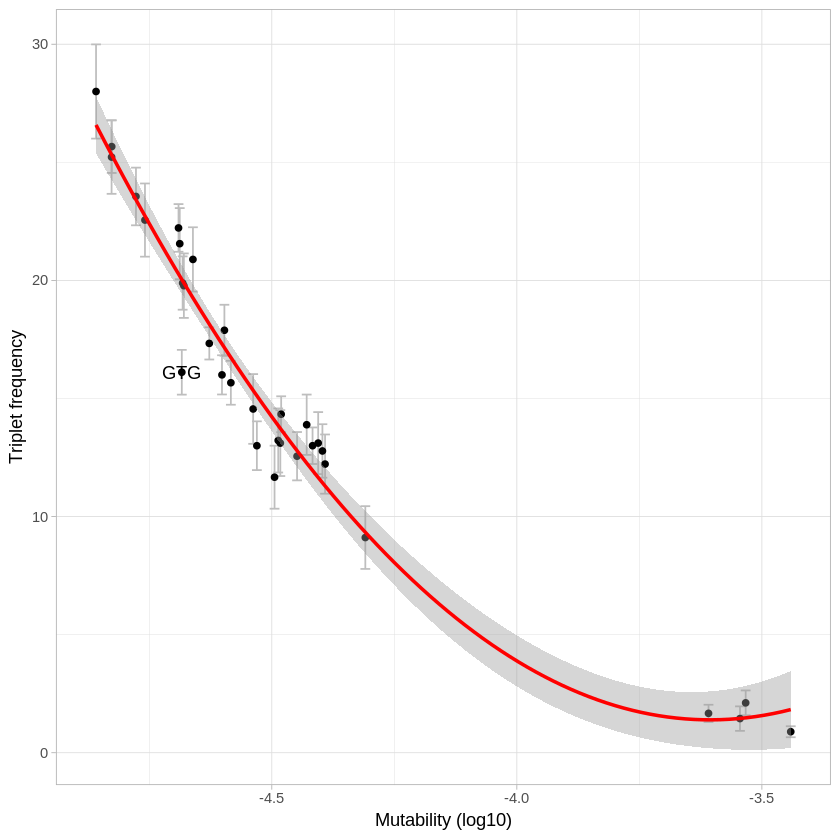

In [11]:
ggplot(data,aes(x=log10mut,y=avCounts_gen1999))+
    theme_light()+
    geom_errorbar(data, mapping=aes(x=log10mut,ymin=stderrLower_gen1999, ymax =stderrUpper_gen1999),color = "grey",width=0.02)+
    geom_point()+
    labs(x ="Mutability (log10)", y = "Triplet frequency")+
    stat_smooth(method="lm",formula=y~poly(x, 2), col = "red")+ #https://sejohnston.com/2012/08/09/a-quick-and-easy-function-to-plot-lm-results-in-r/
#     stat_smooth(method="lm", col = "red")

    

    #selectively labbeling given the dstance from the lm line (god im a genius)
    #https://stackoverflow.com/questions/15015356/how-to-do-selective-labeling-with-ggplot-geom-point/15015389
    geom_text(data=subset(data, meanAbsErr_gen1999 > 3),aes(log10mut,avCounts_gen1999,label=triplet))

# gg_show()
# filename = paste("plots/nonOverlap_tripletChnage_",toString(Sys.Date()),"_gen",gen_chosen,"stdErrBars_1ktriplets_2xMutCov_n10_quadraticRegression_newLabel.pdf",sep="")
# ggsave(filename)

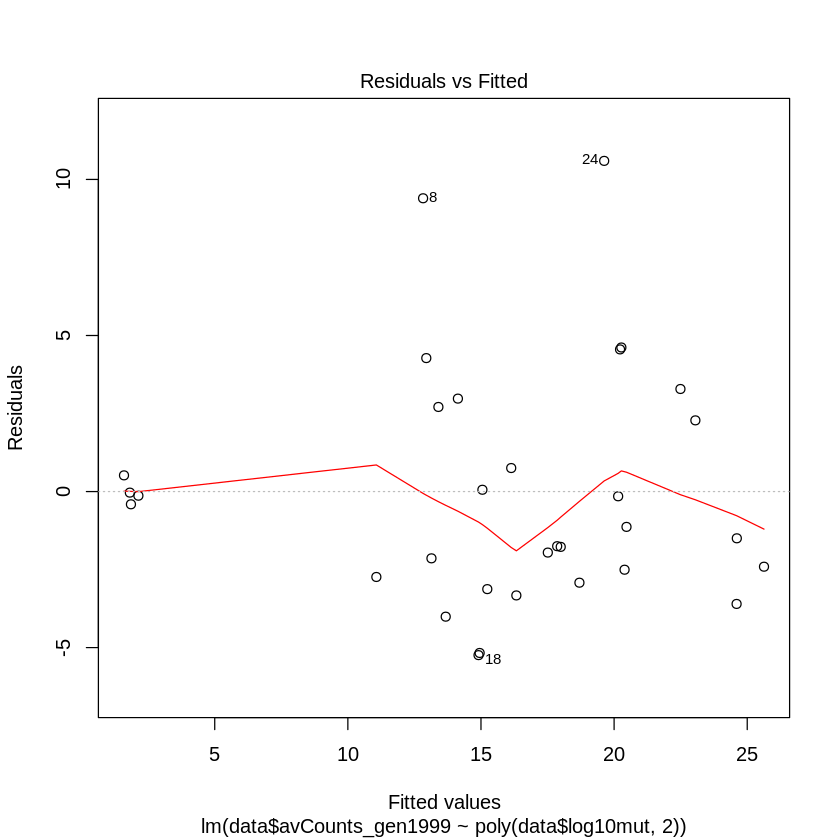

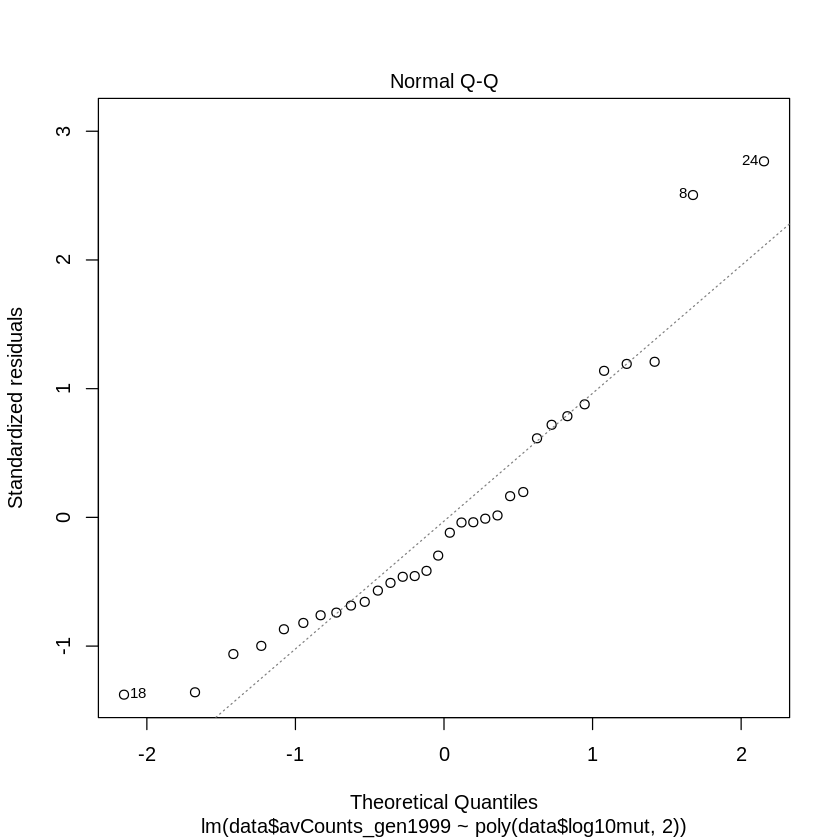

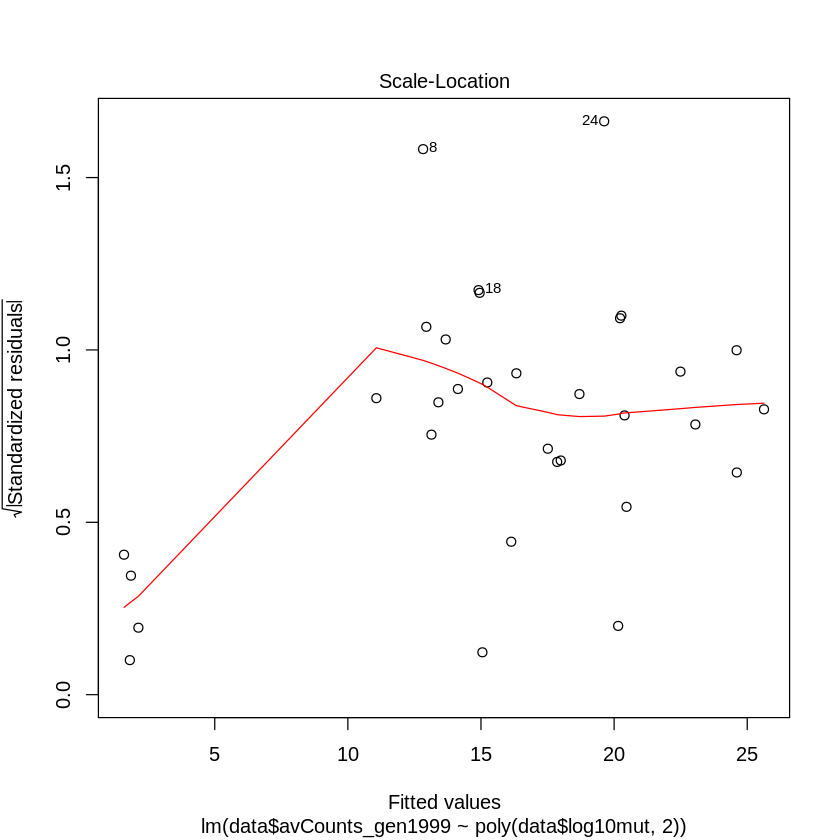

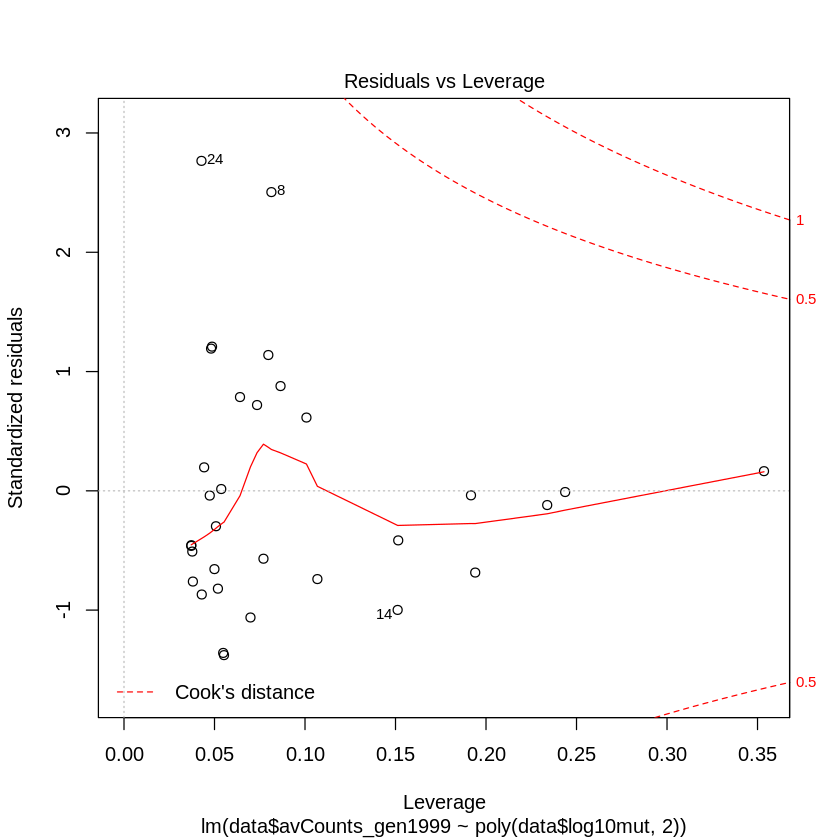

In [43]:
plot(lm(data$avCounts_gen1999~poly(data$log10mut,2)))